# Hangman

Date: 03/02/2024.
From: Practice Python. 
Link to [exercise](https://www.practicepython.org/exercise/2017/01/10/32-hangman.html).

### Description

In this exercise, we will finish building Hangman. In the game of Hangman, the player only has 6 incorrect guesses (head, body, 2 legs, and 2 arms) before they lose the game.

In Part 1, we loaded a random word list and picked a word from it. In Part 2, we wrote the logic for guessing the letter and displaying that information to the user. In this exercise, we have to put it all together and add logic for handling guesses.

Copy your code from Parts 1 and 2 into a new file as a starting point. Now add the following features:

- Only let the user guess 6 times, and tell the user how many guesses they have left.
- Keep track of the letters the user guessed. If the user guesses a letter they already guessed, don’t penalize them - let them guess again.

**Optional additions**

- When the player wins or loses, let them start a new game.
- Rather than telling the user "You have 4 incorrect guesses left", display some picture art for the Hangman. This is challenging - do the other parts of the exercise first!

Your solution will be a lot cleaner if you make use of functions to help you!

### My solution

In [1]:
from os import path
from random import randint
import requests
from matplotlib import image as img
from matplotlib import pyplot as plt

response = requests.get("http://norvig.com/ngrams/sowpods.txt")
words = response.text.split("\n")

Welcome to Hangman!

_ _ _ _ _ _ _ _ _ _ _ _ _ 




Guess your letter: a


_ _ _ _ _ _ _ A _ _ _ _ _ 




Guess your letter: e


_ _ _ _ _ _ _ A _ _ _ E _ 




Guess your letter: i


_ I _ _ I _ _ A _ _ I E _ 




Guess your letter: o


_ I _ _ I O _ A _ _ I E _ 




Guess your letter: u


Incorrect!



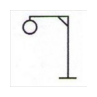


_ I _ _ I O _ A _ _ I E _ 




Guess your letter: a


This letter has already been guessed.



Guess your letter: p


Incorrect!



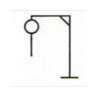


_ I _ _ I O _ A _ _ I E _ 




Guess your letter: r


_ I _ _ I O _ A _ R I E _ 




Guess your letter: d


Incorrect!



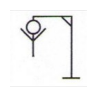


_ I _ _ I O _ A _ R I E _ 




Guess your letter: s


_ I _ _ I O _ A _ R I E S 




Guess your letter: m


Incorrect!



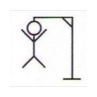


_ I _ _ I O _ A _ R I E S 




Guess your letter: n


Incorrect!



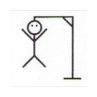


_ I _ _ I O _ A _ R I E S 




Guess your letter: l


_ I _ L I O L A _ R I E S 




Guess your letter: t


_ I _ L I O L A T R I E S 




Guess your letter: b


B I B L I O L A T R I E S 


Congratulations! You got the word BIBLIOLATRIES.


Wanna play again? [Y/N] y


Welcome to Hangman!

_ _ _ _ _ 




Guess your letter: a


A _ _ _ _ 




Guess your letter: e


Incorrect!



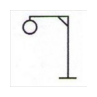


A _ _ _ _ 




Guess your letter: i


A _ _ I _ 




Guess your letter: p


A P _ I _ 




Guess your letter: l


Incorrect!



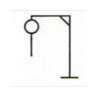


A P _ I _ 




Guess your letter: r


Incorrect!



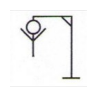


A P _ I _ 




Guess your letter: s


A P _ I S 




Guess your letter: l


This letter has already been guessed.



Guess your letter: h


A P H I S 


Congratulations! You got the word APHIS.


Wanna play again? [Y/N] n


In [9]:
def display_game(game):
    print(" ".join(game), "\n")

game_on = "Y"

while game_on == "Y":
    secret = words[randint(0, len(words) - 1)]
    trial = ["_"] * len(secret)
    guesses = []
    incorrect_guesses = 0
    
    print("Welcome to Hangman!\n")
    display_game(trial)
    
    while "_" in " ".join(trial) and incorrect_guesses < 6:
        letter = input("\nGuess your letter:").upper()
        if letter in guesses:
            print("This letter has already been guessed.")
            continue
        else:
            guesses.append(letter)
        if letter in secret:
            last_index = 0
            for _ in range(secret.count(letter)):
                idx_letter = secret.index(letter, last_index)
                trial[idx_letter] = letter
                last_index = idx_letter + 1
            display_game(trial)
        else:
            print("Incorrect!\n")
            incorrect_guesses += 1
            image = img.imread(f"{path.abspath("hangman_images")}/{incorrect_guesses}.jpg")
            plt.figure(figsize=(1,1))
            plt.imshow(image)
            plt.axis("off")
            plt.show()
            print()
            display_game(trial)
    
    if incorrect_guesses < 6:
        print(f"\nCongratulations! You got the word {secret}.")
    else:
        print(f"Sorry, you failed! The word was {secret}. Better luck next time...\n")
    
    game_on = input("Wanna play again? [Y/N]").upper()

### Sample solution
[Link](https://www.practicepython.org/solution/2017/01/18/32-hangman-solutions.html) to sample solution.